### 1

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [69]:
def linear(x,m = 1,b = 1 ):
    return x*m + b

def sigmoid(t):
    return 1/(1 + np.exp(-t))

def clases(list):
    return len(set(list))

def to_classlabel(t):
    return np.argmax(t,axis=1)

def softmax(t):
    return (np.exp(t) / np.sum(np.exp(t), axis=1)[:,None] )#[:,np.newaxis]    

def hot_ones(M,classes_num=1):
    return (np.arange(np.max(M) + 1) == M[:, None]).astype('float')

def logistic_regression(X,t, eta=0.1, steps=100):
    
    w = np.random.rand(X.shape[1])
    for i in range(steps):
        wTX = np.dot(X,w)
        mu = sigmoid(wTX)
        g = np.dot(X.T,(mu-t ))
        w -= 0.1*g
        
    return w   

def softmax_regression(X,t,eta=0.1,steps=100):
    w = np.random.rand(X.shape[1],clases(t) )
    Targets = hot_ones(t)
    for i in range(steps):
        w -= eta*np.dot(X.T, softmax(np.dot(X,w)) - Targets ) 
        
    return w    

def circle_points(center=[0,0], ratio = [0,1], limx = [-1,1], limy = [-1,1],nmax=1000):
    dat = []
    for i in range(nmax):
        x = (limx[1] - limx[0])* np.random.rand() + limx[0]
        y = (limy[1] - limy[0])* np.random.rand() + limy[0]
        
        if ratio[0] <= (x - center[0])**2 + (y - center[1])**2 <= ratio[1]:
            dat.append([x,y])
    
    return np.asarray(dat)
        
        
        
        

In [14]:
C1 = circle_points()
C2 = circle_points(center = [3,3], limx = [0,4], limy = [0,4])

In [15]:
C2.shape

(191, 2)

In [10]:
#Data1.shape

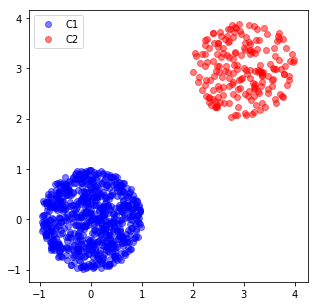

In [20]:
plt.figure(figsize = (5,5))
plt.scatter(C1[:,0],C1[:,1],color = 'blue',alpha = 0.5,label = 'C1')
plt.scatter(C2[:,0],C2[:,1],color = 'red',alpha = 0.5,label = 'C2')
plt.legend(loc = 'best')
plt.show()

In [22]:
ones = np.ones([C1.shape[0] + C2.shape[0],1])

In [24]:
X = np.vstack((C1, C2))
X = np.hstack(( ones,X) )    
    

In [28]:
X.shape

(959, 3)

In [26]:
t = np.hstack(( np.zeros(C1.shape[0]), np.ones(C2.shape[0])))

In [27]:
t.shape

(959,)

In [30]:
weights = logistic_regression(X,t, steps = 500)

In [31]:
weights

array([-61.20788806,  40.18161825,  40.13874105])

In [32]:
scores = np.dot(X,weights)
preds = np.round( sigmoid(scores) )

In [35]:
print('Accuracy: {0}'.format((preds == t).sum() / len(preds)) )

Accuracy: 1.0


In [34]:
np.round( sigmoid(np.dot([1,3,3],weights)) )

1.0

In [36]:
x = np.linspace(-1,4,100)
y = (-1/weights[2])*(weights[0] + weights[1]*x)

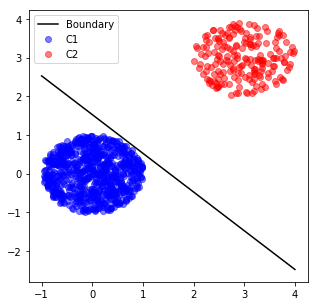

In [39]:
plt.figure(figsize = (5,5))
plt.scatter(C1[:,0],C1[:,1],color = 'blue',alpha = 0.5,label = 'C1')
plt.scatter(C2[:,0],C2[:,1],color = 'red',alpha = 0.5,label = 'C2')
plt.plot(x,y,color = 'black', label = 'Boundary')
plt.legend(loc = 'best')
plt.show()

In [40]:
#log_reg = LogisticRegression(fit_intercept=True)
#log_reg.fit(X, t)

In [41]:
#print (log_reg.intercept_, log_reg.coef_)


In [42]:
x = np.linspace(-2,3,100)
e = np.random.normal(0, 0.3,100)

In [43]:
#y = 2*x - 0.5

In [44]:
x1 = (3+2)*np.random.rand(100)- 2
y1 = (6.5+3.4)*np.random.rand(100)-3.5 


In [45]:
y = 2 * x1 - 0.5

In [46]:
#for a,b in zip(y1,y):
#    print(a,':',b)

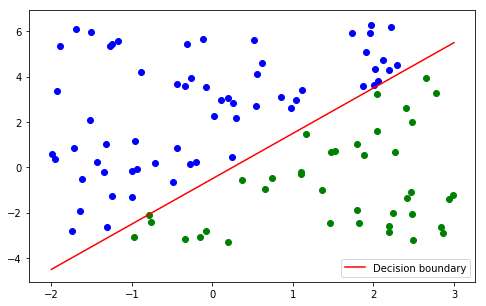

In [47]:
plt.figure( figsize=(8,5))
for a,b,c in zip(x1,y1,y):
    if b<c:
        plt.scatter(a,b,color = 'green')
    if b >= c:
        plt.scatter(a,b,color = 'blue')
        
plt.plot(x,2*x-0.5,color = 'red', label = 'Decision boundary')
#plt.plot(x1,y,color = 'red', label = 'Decision boundary')

plt.legend(loc = 'best')
plt.show()

In [48]:
t1 = np.where(y1<y,0,1)

In [1]:
#t = t.reshape(( t.shape + (1,) ))

In [49]:
t1.shape

(100,)

In [13]:
x.shape[0]

100

In [50]:
X1 = np.ones([x.shape[0],3])
X1[:,1] = x1
X1[:,2] = y1

In [51]:
X1.shape

(100, 3)

In [54]:
weights1 = logistic_regression(X1,t1)

In [55]:
weights1

array([  2.17378903, -10.22269777,   5.48596327])

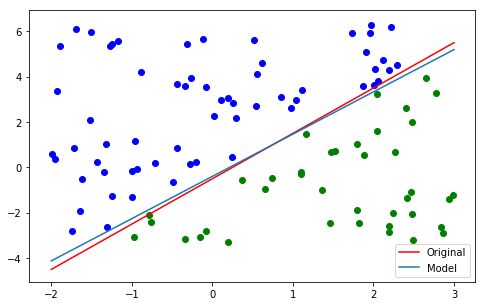

In [57]:
plt.figure( figsize=(8,5))
for a,b,c in zip(x1,y1,y):
    if b<c:
        plt.scatter(a,b,color = 'green')
    if b >= c:
        plt.scatter(a,b,color = 'blue')
        
plt.plot(x,2*x-0.5,color = 'red', label = 'Original')
        
plt.plot(x,(-1/weights1[2])*(weights1[0] + weights1[1]*x),label='Model')
plt.legend(loc = 'best')
plt.show()

## Softmax

In [59]:
C3 = circle_points(center=[3,0], ratio = [0.5,1], limx = [0,4], limy = [-2,2],nmax=1000)

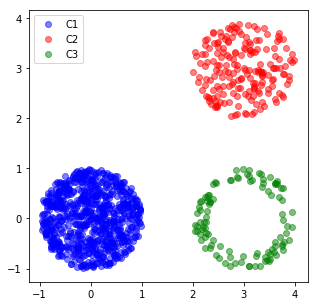

In [60]:
plt.figure(figsize = (5,5))
plt.scatter(C1[:,0],C1[:,1],color = 'blue',alpha = 0.5,label = 'C1')
plt.scatter(C2[:,0],C2[:,1],color = 'red',alpha = 0.5,label = 'C2')
plt.scatter(C3[:,0],C3[:,1],color = 'green',alpha = 0.5,label = 'C3')

plt.legend(loc = 'best')
plt.show()

In [61]:
ones1 = np.ones([C1.shape[0] + C2.shape[0] + C3.shape[0] ,1])

In [62]:
t2 = np.hstack((t,np.ones([C3.shape[0]]) + 1))

In [67]:
t2.shape

(1065,)

In [63]:
X2 = np.vstack( (C1, C2, C3) )
X2 = np.hstack(( ones1,X2) )    

In [68]:
X2.shape

(1065, 3)

In [70]:
weight = softmax_regression(X=X2,t=t2,eta=0.1,steps=100)

In [78]:
x = np.linspace(-0.2,3.1,100)


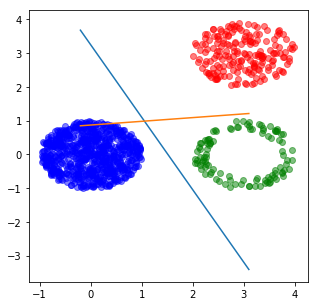

In [85]:
plt.figure(figsize = (5,5))
plt.scatter(C1[:,0],C1[:,1],color = 'blue',alpha = 0.5,label = 'C1')
plt.scatter(C2[:,0],C2[:,1],color = 'red',alpha = 0.5,label = 'C2')
plt.scatter(C3[:,0],C3[:,1],color = 'green',alpha = 0.5,label = 'C3')

plt.plot(x,(-1/weight[0,2])*(weight[0,0] + weight[0,1]*x))
plt.plot(x,(-1/weight[1,2])*(weight[1,0] + weight[1,1]*x))
#plt.plot(x,(-1/weight[2,2])*(weight[2,0] + weight[2,1]*x))
plt.show()